
<img src="images/utfsm.png" alt="" width="200px" align="right"/>

<br/>

# Taller de Manejo y Visualización de Datos con Python
Matplotlib & Seaborn<br/>
Felipe González P.<br/>
felipe.gonzalezp.12@sansano.usm.cl<br/>

<br/>
Jueves Bloque 7-8<br/>
Campus San Joaquín




<h1 align="center"> Visualización </h1>

### Matplotlib
La meta de esta librería de python es hacer que las cosas fáciles sean aún más fáciles y que las cosas difíciles sean posibles. Es posible generar distintos gráficos: histogramas, espectros de potencia, gráficos de barra, diagramas de errores, diagramas de dispersión, etc.., con solo unas pocas líneas de código. 
    
<div align="center"> <img src="matplotlib.png"></img></div>
 <div align="center">Ver ejemplos [aquí](https://matplotlib.org/gallery/index.html)</div>

# Seaborn
Es una librería basada en matplotlib que permite la visualización de datos. Provee una interfaz que permite realizar gráficos vinculados con la estadística.

<div align="center"> <img src="seaborn.png" ></div>

<div align="center" > Ver ejemplos [aquí](https://seaborn.pydata.org/examples/index.html)</div>

### Importar las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# imprimir graficos en el notebook
% matplotlib inline



### Ver los datos desde [url](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Borrar columna 'Unnamed 0"

In [3]:
del tips['Unnamed: 0']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Displot

Displot combina la función 'hist' de matplotlib con las funciones kdeplot () y rugplot () de seaborn. También puede adaptarse a distribuciones scipy.stats.

### Mostrar un "displot" de la columna 'total_bill'

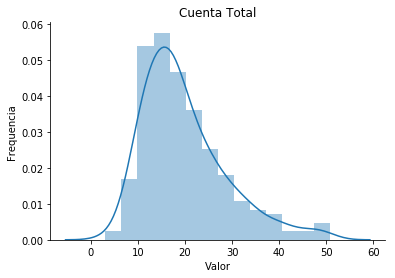

In [4]:
# crear  displot
ttbill = sns.distplot(tips.total_bill);

# establecer etiquetas y titulo
ttbill.set(xlabel = 'Valor', ylabel = 'Frequencia', title = "Cuenta Total")

# borrar borde de la derecha y la izquierda
sns.despine()


# Jointplot

Dibuja un gráfico de dos variables con gráficos bivariados y univariados.


### Mostrar relación entre total_bill y tip

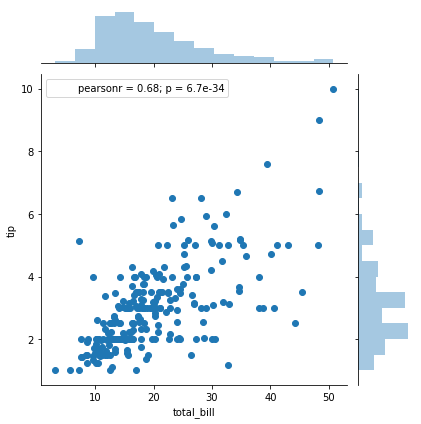

In [5]:
sns.jointplot(x ="total_bill", y ="tip", data = tips)
#seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)¶



# Pairplot

Traza relaciones por pares en un conjunto de datos.

De manera predeterminada, esta función creará una grilla de ejes de manera que cada variable en los datos se compartirá en el eje 'y' en una sola fila y en el eje 'x' en una sola columna. Los ejes diagonales se tratan de manera diferente, dibujando un gráfico para mostrar la distribución univariante de los datos para la variable en esa columna.

También es posible mostrar un subconjunto de variables o trazar diferentes variables en las filas y columnas.

Esta es una interfaz de alto nivel para PairGrid que pretende facilitar el dibujo de algunos estilos comunes. Usar PairGrid directamente si necesita más flexibilidad.




### Crear una imagen con la relación entre total_bill, tip y size

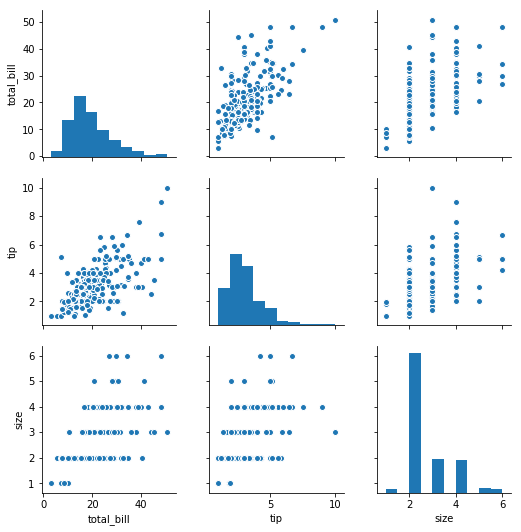

In [6]:
sns.pairplot(tips)


# Stripplot

Dibuja un diagrama de dispersión donde una variable es categórica.

Los datos de entrada se pueden pasar en una variedad de formatos, que incluyen:

* Vectores de datos representados como listas, matrices de numpy o Series de panda pasan directamente a los parámetros.
* Un DataFrame de "forma larga", en cuyo caso las variables x, y, y hue se determinarán según cómo se trazan los datos.
* Cualquier cosa aceptada por plt.boxplot (por ejemplo, una matriz 2d o una lista de vectores)
* En la mayoría de los casos, es posible usar objetos numpy o Python, pero los objetos pandas son preferibles porque los nombres asociados se usarán para anotar los ejes. Además, puede usar tipos categóricos para las variables de agrupamiento para controlar el orden de los elementos de la gráfica.

### Presentar la relación entre days y total_bill

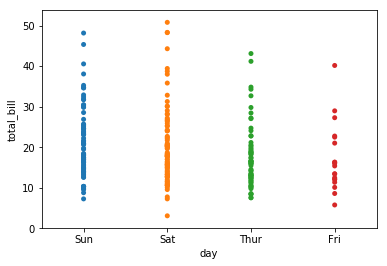

In [7]:
sns.stripplot(x = "day", y = "total_bill", data = tips);
#sns.stripplot(x = "day", y = "total_bill", data = tips);



### Crear un stripplot con eje y = day y eje x = tip. Diferenciar los puntos por género


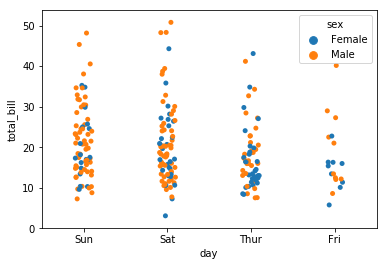

In [8]:
sns.stripplot(x = "day", y = "total_bill", hue="sex", data = tips, jitter = True);


### Crear un boxplot presentando el total_bill por day diferenciado por time (Dinner or Lunch)

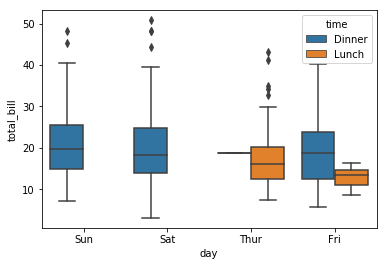

In [9]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);


# FacetGrid

En particular, FacetGrid se usa para dibujar gráficos con múltiples ejes donde cada eje muestra la misma relación condicionada en diferentes niveles de alguna variable. Es posible condicionar hasta tres variables asignando variables a las filas y columnas de la cuadrícula y usando diferentes colores para los elementos de la gráfica


### Crear dos histogramas del valor de tip  basado en time = Dinner y time= Lunch. Los gráficos deben estar lado a lado

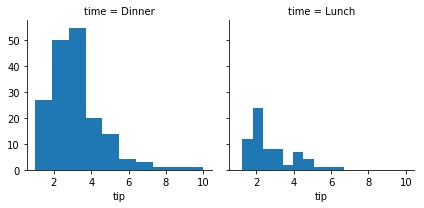

In [10]:

# Crear 'grilla'
g = sns.FacetGrid(tips, col = "time") #cambiar por 'sex'
g.map(plt.hist,'tip');


### Crea dos scatterplots, uno para Hombres y otro para Mujeres, presentando la relación entre total_bill y tip. Diferencia por smoker o no smoker

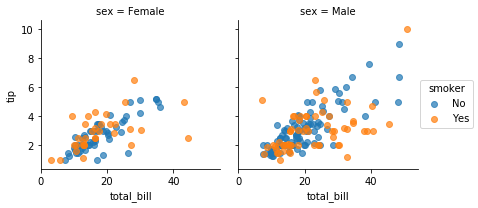

In [11]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7) #Proar variando el valor de alpha

g.add_legend();

<h1 align="center"> INDEX </h1>

Index será una herramienta que nos permitirá manejar la data fácilmente. 

### Ejemplo

In [12]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


### Establecer como índice del dataframe la columna *month*

In [13]:
df.set_index('month')


,sale,year
month,,
1,55,2012
4,40,2014
7,84,2013
10,31,2014


### Es poble crear un índice múltiple

In [14]:
df.set_index(['year', 'month'])


,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


### Incluso es posible crear un índice múltiple utilizando un conjunto de valores  y una columna

In [15]:
df.set_index([[1, 2, 3, 4], 'year']) #hay dos indices 


,,month,sale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


# ¿Por qué indexar?




In [16]:
df = pd.DataFrame({'foo':np.random.random(), 'index':range(10000)})
df_with_index = df.set_index(['index'])

Aquí Pandas tiene que operar sobre cada valor de la columna hasta encontrar el que es igual a '999'

In [17]:
df[df['index'] == 999]


,foo,index
999,0.189296,999


Si queremos encontrar la misma columna utilizando index, lo podemos hacer de esta manera: 

In [18]:
df_with_index.loc[999] #En este caso hay una hash table por detras, lo que permite que la operacion sea mas eficiente


foo    0.189296
Name: 999, dtype: float64

Encontrar elementos por index es mucho más rapido que encontrarlo buscando fila por fila


In [ ]:
In [254]: %timeit df[df['index'] == 999]
1000 loops, best of 3: 368 µs per loop

In [255]: %timeit df_with_index.loc[999]
10000 loops, best of 3: 57.7 µs per loop

Sin embargo, se debe considerar el tiempo de construcción del indice

In [ ]:
In [220]: %timeit df.set_index(['index'])
1000 loops, best of 3: 330 µs per loop

<h1 align="center" > Entonces, ¿Cuando será útil indexar?</h1>

<h1 align="center">Ejercicios</h1>

<h1 align="center"> Visualizando el desastre del Titanic </h1>

Los datos de este desastre fueron extraídos originalmente desde [aquí](https://www.kaggle.com/c/titanic)

Detalles sobre el dataset son posibles de encontrar [aquí](https://www.kaggle.com/c/titanic/data)

### Recuerda tener las librerías necesarias

### Los datos pueden ser extraídos desde [url](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)
### Recuerda guardarlos en una variable

### Establecer la columna *PassengerId* como el índice del dataframe

### Crear un *pie chart* mostrando la proporción entre hombres y mujeres

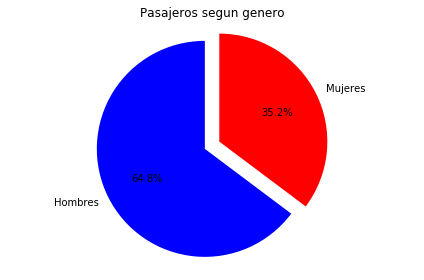

### Utilizar Lmplot de seaborn para mostrar la relación entre los campos *Fare* y *Age*, el color de los puntos debe diferir por género

(-5, 85)

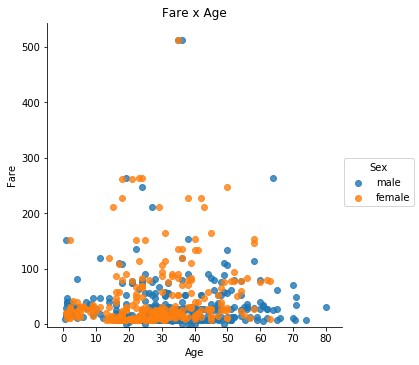

# Con sus propias palabras...¿Qué hace Lmplot?

In [42]:
#Ingrese su respuesta aqui

###  ¿Cuantas personas sobrevivieron?

342

### Crea un histograma evaluando la tarifa pagada. Se debe mostrar desde mayor a menor frecuencia

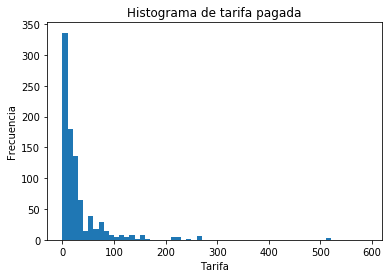

### Crea un gráfico de barra horizontal de la columna *Sex*

**HINT:** Utiliza barh

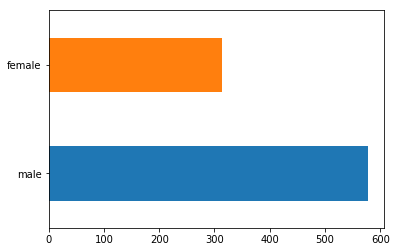

### Crea un grafico de barra vertical que muestre la mediana de la tarifa pagada para subir al barco según género



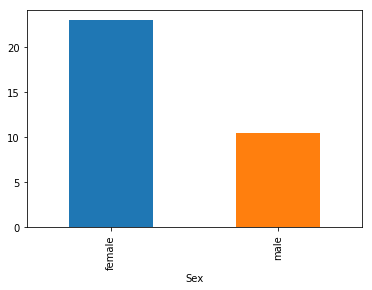

### BONUS: Crea tu propia pregunta y respondela utilizando una visualización